In [ ]:
import numpy as np
import cv2 as cv

In [ ]:
filename = 'image1.jpg'
img = cv.imread(filename)

In [ ]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)

In [ ]:
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv.imshow('dst',img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

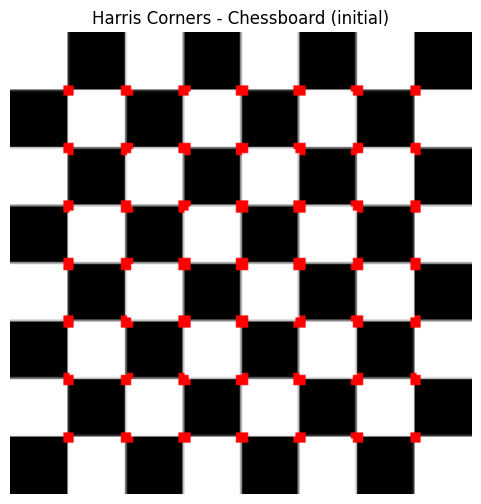

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to run Harris detector and show results
def harris_detect(image_path, blockSize=2, ksize=3, k=0.04, thresh_ratio=0.01):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Harris corner detection
    dst = cv2.cornerHarris(gray, blockSize, ksize, k)
    dst = cv2.dilate(dst, None)
    
    # Threshold for marking corners
    thresh = thresh_ratio * dst.max()
    
    # Mark corners in red
    img_marked = img.copy()
    img_marked[dst > thresh] = [0, 0, 255]
    
    return img, dst, img_marked

# Function to plot results
def show_results(original, marked, title):
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(marked, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')

# Test with chessboard
orig, dst, marked = harris_detect('chessboard.jpg')
show_results(orig, marked, "Harris Corners - Chessboard (initial)")
plt.show()


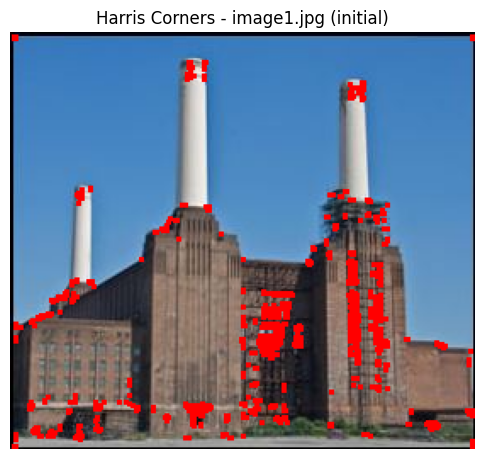

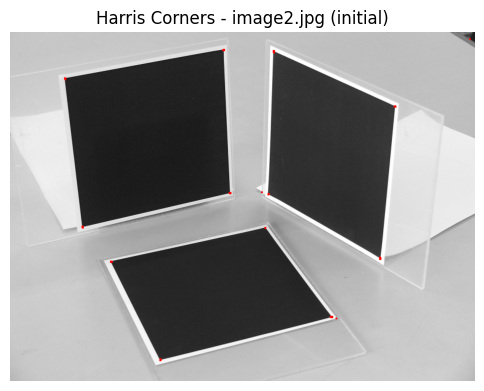

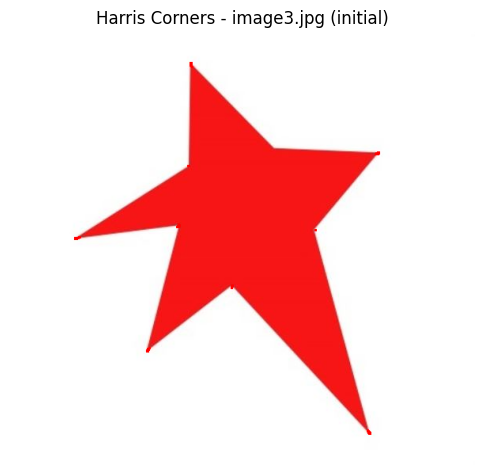

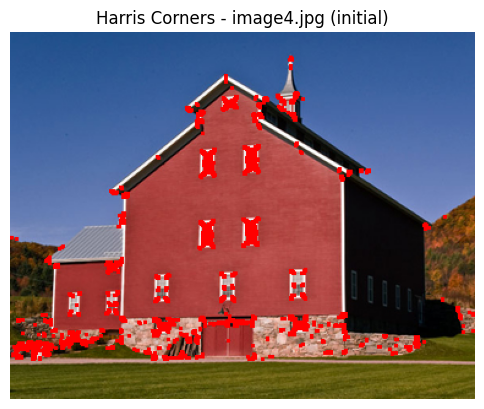

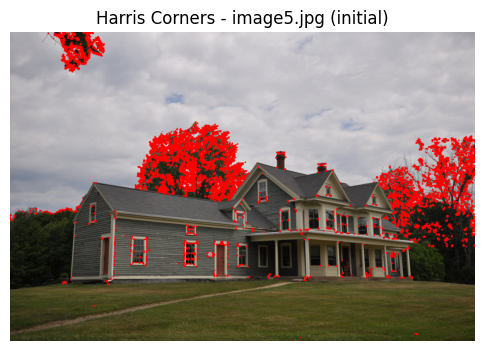

In [2]:
image_files = [
    'image1.jpg',
    'image2.jpg',
    'image3.jpg',
    'image4.jpg',
    'image5.jpg'
]

for img_file in image_files:
    orig, dst, marked = harris_detect(img_file)
    show_results(orig, marked, f"Harris Corners - {img_file} (initial)")
    plt.show()

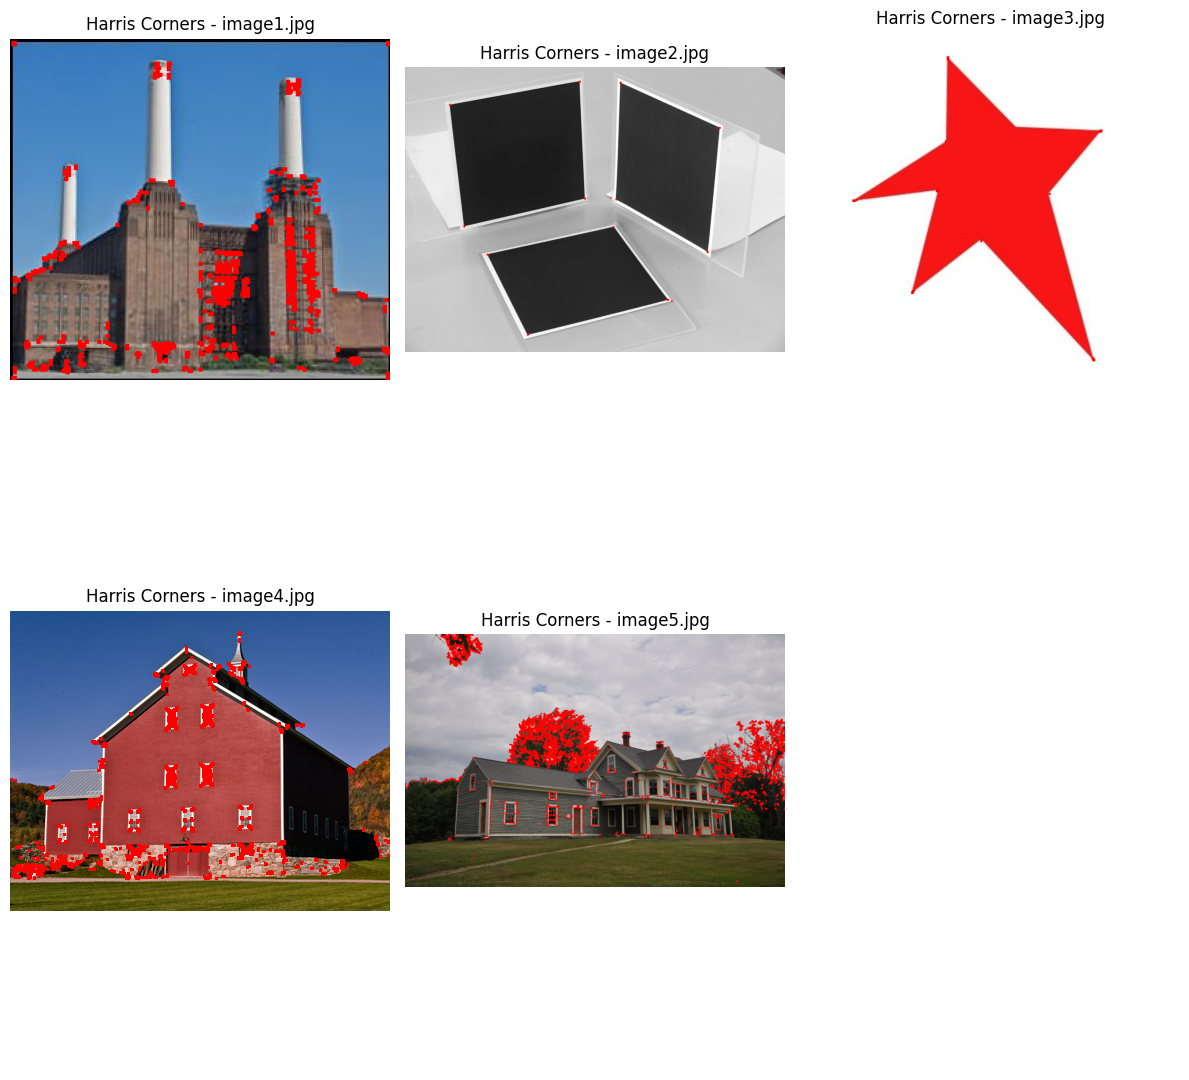

In [6]:
image_files = [
    'image1.jpg',
    'image2.jpg',
    'image3.jpg',
    'image4.jpg',
    'image5.jpg'
]

fig, axes = plt.subplots(2, 3, figsize=(12, 12))
axes = axes.flatten()

for idx, img_file in enumerate(image_files):
    orig, dst, marked = harris_detect(img_file)
    axes[idx].imshow(cv2.cvtColor(marked, cv2.COLOR_BGR2RGB))
    axes[idx].set_title(f"Harris Corners - {img_file}")
    axes[idx].axis('off')

# Hide unused subplots
for i in range(len(image_files), 6):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

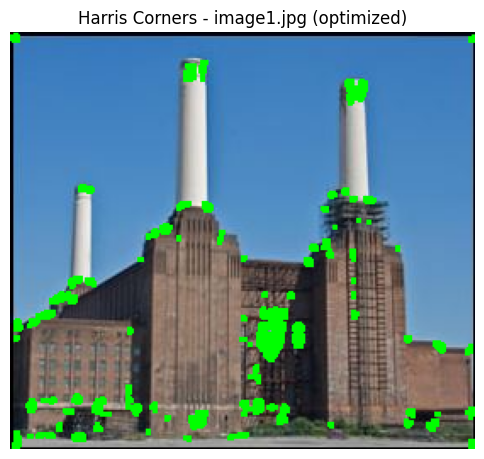

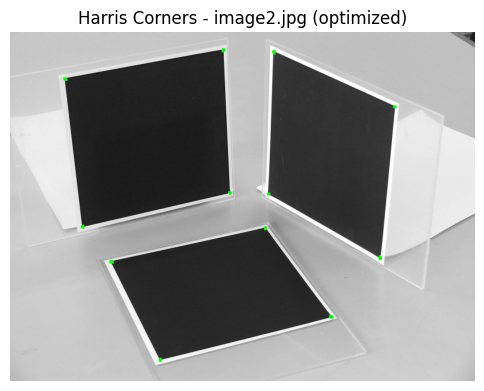

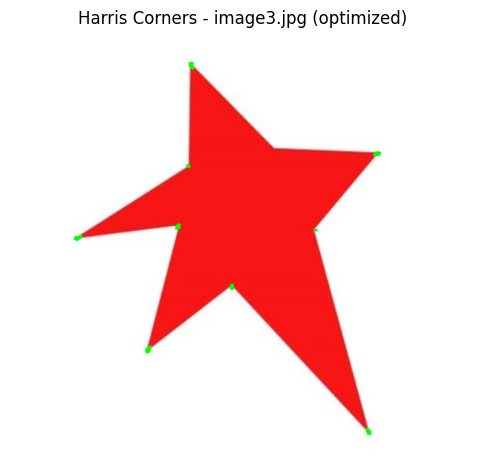

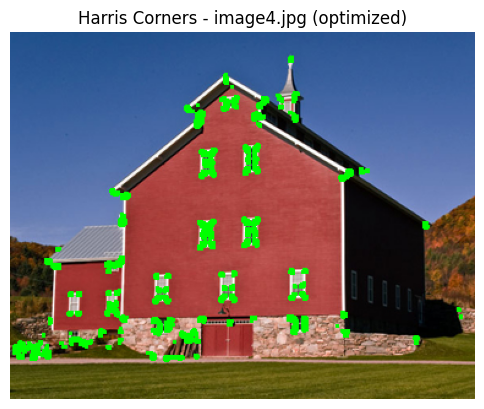

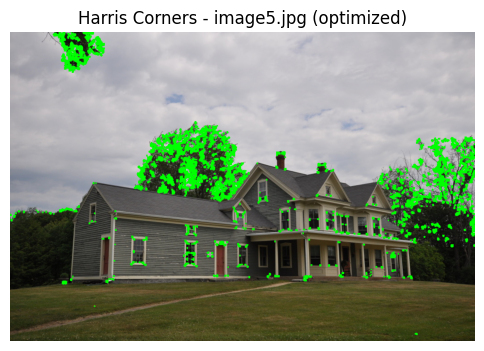

In [7]:
# Example optimized function
def harris_detect_optimized(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Try larger block and kernel sizes
    blockSize = 4
    ksize = 5
    k = 0.06
    
    dst = cv2.cornerHarris(gray, blockSize, ksize, k)
    dst = cv2.dilate(dst, None)
    
    # Try lower threshold to include weaker corners
    thresh = 0.02 * dst.max()
    
    img_marked = img.copy()
    img_marked[dst > thresh] = [0, 255, 0]  # green for optimized
    
    return img_marked

# Apply optimization on the same 5 images
for img_file in image_files:
    optimized_img = harris_detect_optimized(img_file)
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(optimized_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Harris Corners - {img_file} (optimized)")
    plt.axis('off')
    plt.show()


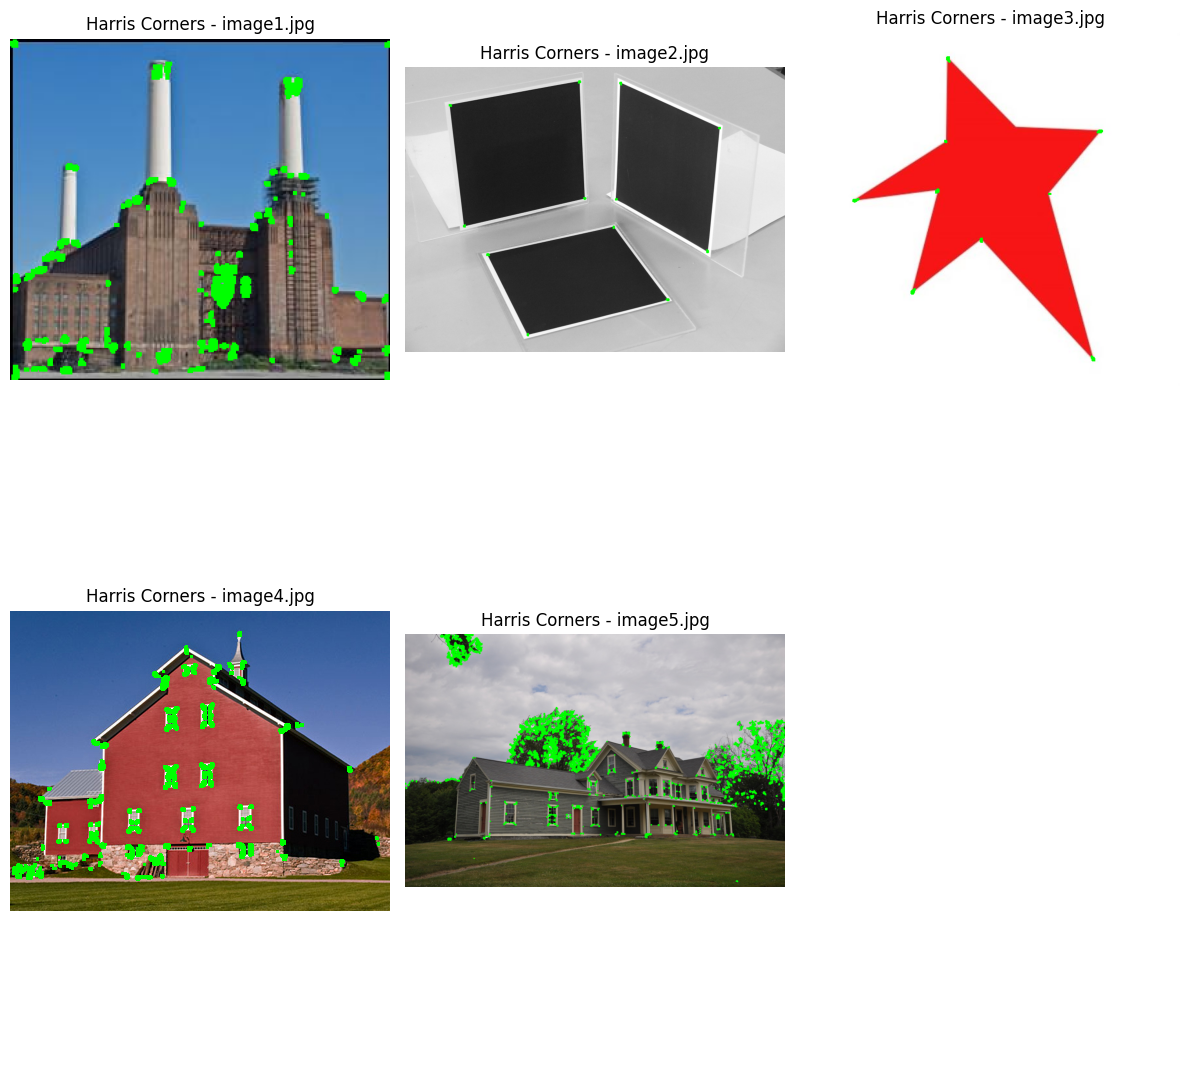

In [9]:
image_files = [
    'image1.jpg',
    'image2.jpg',
    'image3.jpg',
    'image4.jpg',
    'image5.jpg'
]

fig, axes = plt.subplots(2, 3, figsize=(12, 12))
axes = axes.flatten()

for idx, img_file in enumerate(image_files):
    marked = harris_detect_optimized(img_file)
    axes[idx].imshow(cv2.cvtColor(marked, cv2.COLOR_BGR2RGB))
    axes[idx].set_title(f"Harris Corners - {img_file}")
    axes[idx].axis('off')

# Hide unused subplots
for i in range(len(image_files), 6):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [22]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt



def hariss_subpixel_corners(filename):
    img = cv.imread(filename)
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    # find Harris corners
    gray = np.float32(gray)
    dst = cv.cornerHarris(gray,2,3,0.04)
    dst = cv.dilate(dst,None)
    ret, dst = cv.threshold(dst,0.001*dst.max(),255,0)
    dst = np.uint8(dst)
    # find centroids
    ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
    # define the criteria to stop and refine the corners
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
    corners = cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
    # Now draw them
    res = np.hstack((centroids,corners))
    res = res.astype(np.int32)
    img[res[:,1],res[:,0]]=[0,0,255]
    img[res[:,3],res[:,2]] = [0,255,0]
    
    return img




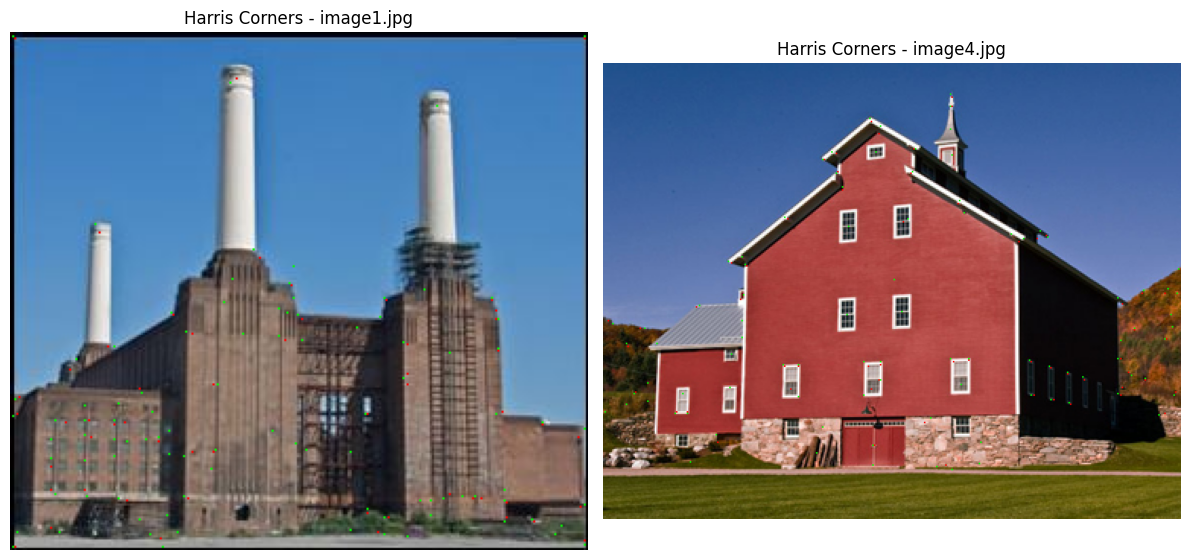

In [23]:
image_files = [
    'image1.jpg',
    'image4.jpg',
]

fig, axes = plt.subplots(1, 2, figsize=(12, 12))
axes = axes.flatten()

for idx, filename in enumerate(image_files):
    marked = hariss_subpixel_corners(filename)
    axes[idx].imshow(cv.cvtColor(marked, cv.COLOR_BGR2RGB))
    axes[idx].set_title(f"Harris Corners - {filename}")
    axes[idx].axis('off')


plt.tight_layout()
plt.show()